Características principales del script:

Generación de tickets sintéticos:

Crea imágenes realistas de tickets con montos aleatorios
Incluye elementos como encabezado, artículos, subtotal, descuento y total
Agrega ruido y distorsiones para simular tickets reales
Guarda la información de los montos asociados a cada imagen


Aumentación de datos:

Aplica transformaciones como rotación, desplazamiento, zoom y cambios de brillo
Genera múltiples variaciones de cada imagen sintética
Mantiene la asociación entre imágenes aumentadas y sus montos originales


Organización de datos:

Crea directorios separados para imágenes originales y aumentadas
Genera un CSV con metadatos que relaciona cada imagen con su monto
Crea un dataset combinado listo para entrenar modelos


Visualización:

Incluye una función para mostrar ejemplos de los tickets generados
Ayuda a verificar visualmente la calidad de las imágenes sintéticas

=== Generando dataset sintético ===
Directorio dataset creado.
Directorio dataset_aumentado creado.
Directorio dataset_sintetico creado.
Generadas 10 imágenes sintéticas...
Generadas 20 imágenes sintéticas...
Generadas 30 imágenes sintéticas...
Generadas 40 imágenes sintéticas...
Generadas 50 imágenes sintéticas...
Dataset sintético de 50 imágenes generado.

=== Aplicando aumentación de datos ===
Procesadas 5/51 imágenes...
Procesadas 10/51 imágenes...
Procesadas 15/51 imágenes...
Procesadas 20/51 imágenes...
Procesadas 25/51 imágenes...
Procesadas 30/51 imágenes...
Procesadas 35/51 imágenes...
Procesadas 40/51 imágenes...
Procesadas 45/51 imágenes...
Procesadas 50/51 imágenes...
Aumentación completada. Generadas 255 imágenes adicionales.

=== Mostrando ejemplos del dataset ===


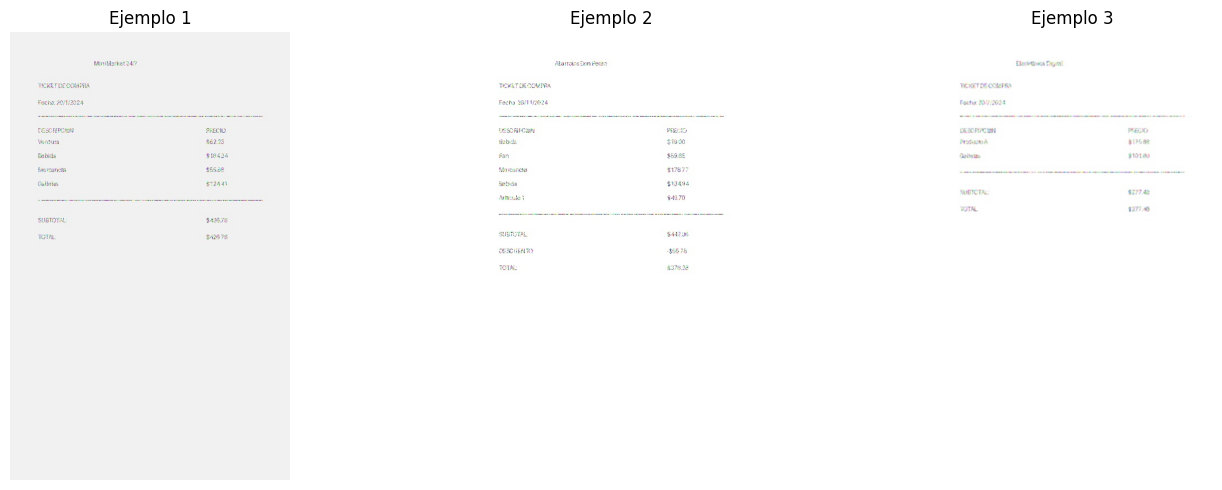

CSV combinado creado con 50 registros.

=== Dataset completo creado con éxito ===
- 50 imágenes sintéticas originales
- 250 imágenes aumentadas
- Total: 300 imágenes


In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def crear_directorios():
    """
    Crea los directorios necesarios para almacenar los datos
    """
    directorios = ['dataset', 'dataset_aumentado', 'dataset_sintetico']
    for dir in directorios:
        if not os.path.exists(dir):
            os.makedirs(dir)
            print(f"Directorio {dir} creado.")

def generar_ticket_sintetico(index, guardar_dir):
    """
    Genera una imagen sintética de un ticket con un monto total aleatorio

    Args:
        index: Índice para nombrar el archivo
        guardar_dir: Directorio donde guardar la imagen

    Returns:
        tuple: (ruta_archivo, monto_total)
    """
    # Crear una imagen en blanco (fondo blanco)
    ancho, alto = 500, 800
    imagen = Image.new('RGB', (ancho, alto), color=(255, 255, 255))
    draw = ImageDraw.Draw(imagen)

    try:
        # Intentar cargar una fuente
        fuente_grande = ImageFont.truetype("arial.ttf", 20)
        fuente_normal = ImageFont.truetype("arial.ttf", 16)
        fuente_pequena = ImageFont.truetype("arial.ttf", 14)
    except:
        # Si no se encuentra la fuente, usar la fuente por defecto
        fuente_grande = ImageFont.load_default()
        fuente_normal = ImageFont.load_default()
        fuente_pequena = ImageFont.load_default()

    # Generar datos aleatorios para el ticket
    nombre_tienda = random.choice([
        "SuperMercado Express", "MiniMarket 24/7", "Tienda de Conveniencia",
        "Farmacia Central", "Abarrotes Don Pedro", "Electrónica Digital"
    ])

    # Generar artículos aleatorios
    articulos = []
    subtotal = 0
    num_articulos = random.randint(2, 5)

    for _ in range(num_articulos):
        nombre = random.choice([
            "Artículo 1", "Producto A", "Item XYZ", "Mercancía",
            "Galletas", "Bebida", "Pan", "Fruta", "Verdura"
        ])
        precio = round(random.uniform(10, 200), 2)
        subtotal += precio
        articulos.append((nombre, precio))

    # Calcular descuento aleatorio (0-20%)
    tiene_descuento = random.choice([True, False])
    if tiene_descuento:
        porcentaje_descuento = random.uniform(0.05, 0.2)
        descuento = round(subtotal * porcentaje_descuento, 2)
    else:
        descuento = 0

    # Calcular total
    monto_total = round(subtotal - descuento, 2)

    # Dibujar el contenido del ticket
    y_pos = 50
    # Encabezado
    draw.text((ancho//2 - 100, y_pos), nombre_tienda, fill=(0, 0, 0), font=fuente_grande)
    y_pos += 40
    draw.text((50, y_pos), "TICKET DE COMPRA", fill=(0, 0, 0), font=fuente_normal)
    y_pos += 30
    draw.text((50, y_pos), f"Fecha: {random.randint(1,30)}/{random.randint(1,12)}/2024", fill=(0, 0, 0), font=fuente_pequena)
    y_pos += 30

    # Línea separadora
    draw.line([(50, y_pos), (ancho-50, y_pos)], fill=(0, 0, 0), width=1)
    y_pos += 20

    # Artículos
    draw.text((50, y_pos), "DESCRIPCIÓN", fill=(0, 0, 0), font=fuente_pequena)
    draw.text((ancho-150, y_pos), "PRECIO", fill=(0, 0, 0), font=fuente_pequena)
    y_pos += 20

    for articulo, precio in articulos:
        draw.text((50, y_pos), articulo, fill=(0, 0, 0), font=fuente_pequena)
        draw.text((ancho-150, y_pos), f"${precio:.2f}", fill=(0, 0, 0), font=fuente_pequena)
        y_pos += 25

    # Línea separadora
    y_pos += 10
    draw.line([(50, y_pos), (ancho-50, y_pos)], fill=(0, 0, 0), width=1)
    y_pos += 30

    # Subtotal
    draw.text((50, y_pos), "SUBTOTAL:", fill=(0, 0, 0), font=fuente_normal)
    draw.text((ancho-150, y_pos), f"${subtotal:.2f}", fill=(0, 0, 0), font=fuente_normal)
    y_pos += 30

    # Descuento si aplica
    if tiene_descuento:
        draw.text((50, y_pos), "DESCUENTO:", fill=(0, 0, 0), font=fuente_normal)
        draw.text((ancho-150, y_pos), f"-${descuento:.2f}", fill=(0, 0, 0), font=fuente_normal)
        y_pos += 30

    # Total
    draw.text((50, y_pos), "TOTAL:", fill=(0, 0, 0), font=fuente_grande)
    draw.text((ancho-150, y_pos), f"${monto_total:.2f}", fill=(0, 0, 0), font=fuente_grande)

    # Guardar la imagen
    nombre_archivo = f"ticket_sintetico_{index:03d}.jpg"
    ruta_archivo = os.path.join(guardar_dir, nombre_archivo)

    # Aplicar un poco de ruido y distorsión para simular un ticket real
    imagen_np = np.array(imagen)

    # Añadir ruido
    ruido = np.random.normal(0, 10, imagen_np.shape).astype(np.uint8)
    imagen_np = cv2.add(imagen_np, ruido)

    # Aplicar desenfoque leve en algunas imágenes
    if random.choice([True, False]):
        kernel_size = random.choice([(3, 3), (5, 5)])
        imagen_np = cv2.GaussianBlur(imagen_np, kernel_size, 0)

    # Ajustar brillo/contraste en algunas imágenes
    if random.choice([True, False]):
        alpha = random.uniform(0.8, 1.2)  # Contraste
        beta = random.randint(-20, 20)  # Brillo
        imagen_np = cv2.convertScaleAbs(imagen_np, alpha=alpha, beta=beta)

    # Guardar imagen procesada
    cv2.imwrite(ruta_archivo, cv2.cvtColor(imagen_np, cv2.COLOR_RGB2BGR))

    return ruta_archivo, monto_total

def generar_dataset_sintetico(num_imagenes=50):
    """
    Genera un conjunto de imágenes sintéticas de tickets

    Args:
        num_imagenes: Número de imágenes a generar

    Returns:
        pandas.DataFrame: DataFrame con las rutas y montos
    """
    crear_directorios()

    datos = []
    for i in range(num_imagenes):
        ruta, monto = generar_ticket_sintetico(i, 'dataset_sintetico')
        datos.append({
            'ruta_imagen': ruta,
            'monto_total': monto
        })
        if (i+1) % 10 == 0:
            print(f"Generadas {i+1} imágenes sintéticas...")

    # Crear DataFrame con las rutas y montos
    df = pd.DataFrame(datos)
    df.to_csv('dataset_sintetico/metadatos.csv', index=False)
    print(f"Dataset sintético de {num_imagenes} imágenes generado.")
    return df

def aumentar_dataset(dir_original='dataset', dir_aumentado='dataset_aumentado', num_aumentaciones=5):
    """
    Aplica aumentación de datos a las imágenes existentes

    Args:
        dir_original: Directorio con imágenes originales
        dir_aumentado: Directorio para guardar imágenes aumentadas
        num_aumentaciones: Número de variaciones a generar por imagen
    """
    if not os.path.exists(dir_aumentado):
        os.makedirs(dir_aumentado)

    # Configurar generador de aumentación
    datagen = ImageDataGenerator(
        rotation_range=10,  # Rotación menor para tickets
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.1,
        zoom_range=0.1,
        brightness_range=[0.85, 1.15],
        fill_mode='nearest'
    )

    # Si no hay imágenes en dir_original, copiar algunas del dir_sintetico
    if not os.listdir(dir_original) and os.path.exists('dataset_sintetico'):
        print("No hay imágenes en el directorio original. Copiando algunas del dataset sintético...")
        import shutil
        archivos = os.listdir('dataset_sintetico')
        imagenes = [f for f in archivos if f.endswith('.jpg') or f.endswith('.png')]
        for i, img in enumerate(imagenes[:10]):  # Copiar las primeras 10 imágenes
            shutil.copy(os.path.join('dataset_sintetico', img), os.path.join(dir_original, f"base_{i}.jpg"))

    # Aplicar aumentaciones a cada imagen
    total_imagenes = len(os.listdir(dir_original))
    if total_imagenes == 0:
        print("¡No hay imágenes para aumentar!")
        return

    contador_procesos = 0
    for archivo in os.listdir(dir_original):
        if not (archivo.endswith('.jpg') or archivo.endswith('.png')):
            continue

        ruta = os.path.join(dir_original, archivo)
        imagen = cv2.imread(ruta)
        if imagen is None:
            print(f"No se pudo leer la imagen: {ruta}")
            continue

        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        imagen = imagen.reshape((1,) + imagen.shape)

        # Generar y guardar imágenes aumentadas
        contador = 0
        for batch in datagen.flow(imagen,
                                  batch_size=1,
                                  save_to_dir=dir_aumentado,
                                  save_prefix=f'aug_{os.path.splitext(archivo)[0]}',
                                  save_format='jpg'):
            contador += 1
            if contador >= num_aumentaciones:
                break

        contador_procesos += 1
        if contador_procesos % 5 == 0 or contador_procesos == total_imagenes:
            print(f"Procesadas {contador_procesos}/{total_imagenes} imágenes...")

    print(f"Aumentación completada. Generadas {total_imagenes * num_aumentaciones} imágenes adicionales.")

def mostrar_ejemplos(num_ejemplos=3, dataset_dir='dataset_sintetico'):
    """
    Muestra algunos ejemplos del dataset sintético

    Args:
        num_ejemplos: Número de ejemplos a mostrar
        dataset_dir: Directorio donde están las imágenes
    """
    archivos = os.listdir(dataset_dir)
    imagenes = [f for f in archivos if f.endswith('.jpg') or f.endswith('.png')]

    if len(imagenes) == 0:
        print("No hay imágenes para mostrar.")
        return

    # Cargar metadatos si existen
    metadatos_path = os.path.join(dataset_dir, 'metadatos.csv')
    if os.path.exists(metadatos_path):
        df = pd.read_csv(metadatos_path)
        info_dict = dict(zip(df['ruta_imagen'], df['monto_total']))
    else:
        info_dict = {}

    # Mostrar ejemplos
    ejemplos = random.sample(imagenes, min(num_ejemplos, len(imagenes)))

    fig, axs = plt.subplots(1, len(ejemplos), figsize=(15, 5))
    if len(ejemplos) == 1:
        axs = [axs]

    for i, ejemplo in enumerate(ejemplos):
        ruta_completa = os.path.join(dataset_dir, ejemplo)
        img = cv2.imread(ruta_completa)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axs[i].imshow(img)
        axs[i].set_title(f"Ejemplo {i+1}")

        # Mostrar monto si está disponible
        if ruta_completa in info_dict:
            axs[i].set_xlabel(f"Monto: ${info_dict[ruta_completa]:.2f}")

        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

def crear_dataset_completo(num_imagenes_sinteticas=50, num_aumentaciones=5):
    """
    Crea un dataset completo generando imágenes sintéticas y aplicando aumentación

    Args:
        num_imagenes_sinteticas: Número de imágenes sintéticas a generar
        num_aumentaciones: Número de variaciones por imagen original
    """
    print("=== Generando dataset sintético ===")
    df = generar_dataset_sintetico(num_imagenes_sinteticas)

    print("\n=== Aplicando aumentación de datos ===")
    aumentar_dataset(dir_original='dataset_sintetico',
                     dir_aumentado='dataset_aumentado',
                     num_aumentaciones=num_aumentaciones)

    print("\n=== Mostrando ejemplos del dataset ===")
    mostrar_ejemplos(3)

    # Crear CSV combinado con todas las imágenes y sus montos
    crear_csv_combinado()

    print("\n=== Dataset completo creado con éxito ===")
    print(f"- {num_imagenes_sinteticas} imágenes sintéticas originales")
    print(f"- {num_imagenes_sinteticas * num_aumentaciones} imágenes aumentadas")
    print(f"- Total: {num_imagenes_sinteticas + (num_imagenes_sinteticas * num_aumentaciones)} imágenes")

def crear_csv_combinado():
    """
    Crea un CSV combinado con todas las imágenes y sus etiquetas
    """
    # Cargar metadatos sintéticos
    csv_path = 'dataset_sintetico/metadatos.csv'
    if not os.path.exists(csv_path):
        print("No se encontró el archivo de metadatos sintéticos.")
        return

    df_original = pd.read_csv(csv_path)
    datos_combinados = df_original.copy()

    # Agregar información de imágenes aumentadas
    dir_aumentado = 'dataset_aumentado'
    if os.path.exists(dir_aumentado):
        nuevos_datos = []
        for archivo in os.listdir(dir_aumentado):
            if not (archivo.endswith('.jpg') or archivo.endswith('.png')):
                continue

            # Extraer el nombre base del archivo aumentado
            # Formato típico: aug_ticket_sintetico_001_xxx.jpg
            partes = archivo.split('_')
            if len(partes) >= 3:
                base_nombre = '_'.join(partes[1:])  # Ignorar el prefijo "aug_"
                base_nombre = base_nombre.split('.')[0]  # Quitar extensión

                # Buscar en el DataFrame original
                coincidencias = df_original[df_original['ruta_imagen'].str.contains(base_nombre)]
                if not coincidencias.empty:
                    monto = coincidencias.iloc[0]['monto_total']
                    nuevos_datos.append({
                        'ruta_imagen': os.path.join(dir_aumentado, archivo),
                        'monto_total': monto
                    })

        if nuevos_datos:
            df_aumentados = pd.DataFrame(nuevos_datos)
            datos_combinados = pd.concat([datos_combinados, df_aumentados])

    # Guardar CSV combinado
    datos_combinados.to_csv('dataset_completo.csv', index=False)
    print(f"CSV combinado creado con {len(datos_combinados)} registros.")

# Ejecutar generación de dataset
if __name__ == "__main__":
    crear_dataset_completo(num_imagenes_sinteticas=50, num_aumentaciones=5)

In [2]:
import pandas as pd
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Cargar CSV
df = pd.read_csv('dataset_completo.csv')

# Dataset personalizado
class ReciboDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        ruta_imagen = self.dataframe.iloc[idx]['ruta_imagen']
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen = cv2.cvtColor(imagen, cv2.COLOR_GRAY2RGB)  # Convierte a RGB

        # Transformaciones
        if self.transform:
            imagen = self.transform(imagen)

        # Etiqueta (monto total)
        monto_total = float(self.dataframe.iloc[idx]['monto_total'])
        return imagen, torch.tensor(monto_total, dtype=torch.float32)

# Transformaciones y normalización
transformaciones = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalizar valores entre -1 y 1
])

# Crear dataset
dataset = ReciboDataset(df, transform=transformaciones)

# Dividir en entrenamiento y prueba
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Tamaño del dataset: {len(dataset)}")
print(f"Entrenamiento: {len(train_dataset)}, Prueba: {len(test_dataset)}")


Tamaño del dataset: 50
Entrenamiento: 40, Prueba: 10


In [3]:
import torch.nn as nn

# Definir el modelo
class ModeloRecibos(nn.Module):
    def __init__(self):
        super(ModeloRecibos, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 32, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Salida: monto total
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Inicializar modelo, pérdida y optimizador
modelo = ModeloRecibos()
criterio = nn.MSELoss()
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001)

# Entrenamiento
for epoch in range(10):  # 10 épocas
    modelo.train()
    total_loss = 0
    for imagenes, montos in train_loader:
        predicciones = modelo(imagenes)
        loss = criterio(predicciones.squeeze(), montos)
        optimizador.zero_grad()
        loss.backward()
        optimizador.step()
        total_loss += loss.item()

    print(f"Época {epoch+1}, Pérdida: {total_loss / len(train_loader):.4f}")


Época 1, Pérdida: 139043.6016
Época 2, Pérdida: 144306.5000
Época 3, Pérdida: 116577.1510
Época 4, Pérdida: 74472.2969
Época 5, Pérdida: 38424.6341
Época 6, Pérdida: 44197.1146
Época 7, Pérdida: 33150.7708
Época 8, Pérdida: 32025.4818
Época 9, Pérdida: 32804.0534
Época 10, Pérdida: 35304.1068


In [4]:
import numpy as np

modelo.eval()
errores = []
predicciones_lista = []
reales_lista = []

with torch.no_grad():
    for imagenes, montos in test_loader:
        predicciones = modelo(imagenes)
        predicciones_lista.extend(predicciones.squeeze().numpy())
        reales_lista.extend(montos.numpy())
        error = criterio(predicciones.squeeze(), montos).item()
        errores.append(error)

mse = np.mean(errores)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")


Error Cuadrático Medio (MSE): 33061.7344


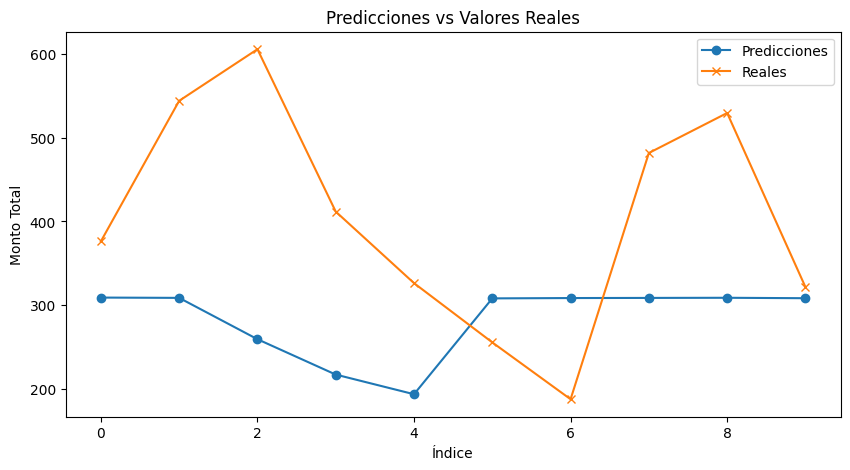

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(predicciones_lista[:50], label='Predicciones', marker='o')
plt.plot(reales_lista[:50], label='Reales', marker='x')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Monto Total')
plt.legend()
plt.show()
